Name: Espiritu, Diego Angelo G.l<br>
Section: CPE019 - CPE32S1<br>
Date: July 10, 2024<br>
Instructor: Engr. Roman Richard<br>

**What is MNIST Dataset?**

MNIST dataset which is a frequently used dataset for machine learning and computer vision tasks is valued highly in the field. It has a set of 60,000 28x28 grayscale images of handwritten digits in the ordered range of 0 to 9, with their labels also included. The data bank surrounds a training dataset with 60,000 examples of training records and a test dataset with 10,000 examples of test records. Compared to other datasets, the MNIST dataset is easy to understand and use, students find it to be a good starting place for learning about machine learning courses and tutorials. By that, it would be a great basis for learning and building such image classification tasks that can be build up step by step.

Solution:

It aim to determine whether this dataset can be utilized to build a Convolutional Neural Network and whether the model chosen will be appropriate for the dataset.

**MNIST Dataset Visualization**

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np
import random
import os
import time
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from tensorflow.keras.applications import VGG16
from scikeras.wrappers import KerasClassifier

In [ ]:
import tensorflow as tf

# Load MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Optionally, you can normalize the pixel values to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

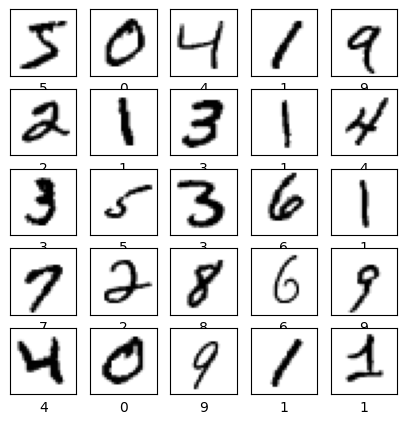

In [ ]:
plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

**Baseline model of the CNN**

In [ ]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/5
938/938 [==============================] - 57s 59ms/step - loss: 0.1766 - accuracy: 0.9460 - val_loss: 0.0604 - val_accuracy: 0.9818
Epoch 2/5
938/938 [==============================] - 55s 58ms/step - loss: 0.0520 - accuracy: 0.9842 - val_loss: 0.0326 - val_accuracy: 0.9889
Epoch 3/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.0527 - val_accuracy: 0.9833
Epoch 4/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0273 - val_accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0251 - val_accuracy: 0.9921


**Perform image augmentation**

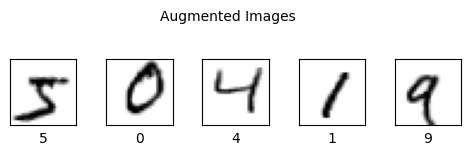

In [ ]:
augment = ImageDataGenerator(
    rotation_range=10,  # Rotate images randomly by up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift images vertically by up to 10% of the height
    zoom_range=0.1,  # Zoom images by up to 10%
    shear_range=0.1,  # Shear intensity (in radians)
    horizontal_flip=False,  # Flip images horizontally
    vertical_flip=False,  # Flip images vertically
    fill_mode='nearest'  # Fill points outside the boundaries with the nearest value
)

augment.fit(x_train)

# Generate augmented images
augmented_images = []
for x_batch, y_batch in augment.flow(x_train, y_train, batch_size=1, shuffle=False):
    augmented_images.append(x_batch[0])
    if len(augmented_images) >= 5:  # Generate 5 augmented images
        break

# Plot the original and augmented images
plt.figure(figsize=(6, 5))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_images[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

plt.suptitle('Augmented Images', fontsize=10)
plt.show()

**Perform feature standardization**

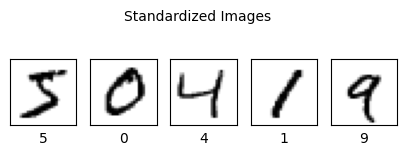

In [ ]:
mean = np.mean(x_train)
std = np.std(x_train)

x_train_standardized = (x_train - mean) / std
x_test_standardized = (x_test - mean) / std

plt.figure(figsize=(5, 5))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_standardized[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

plt.suptitle('Standardized Images', fontsize=10)
plt.show()

**Perform ZCA whitening of your images**

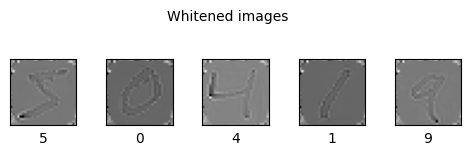

In [ ]:
white = ImageDataGenerator(zca_whitening=True)

white.fit(x_train)

whitened_images = []
for x_batch, _ in white.flow(x_train, y_train, batch_size=1, shuffle=False):
    whitened_images.append(x_batch[0])
    if len(whitened_images) >= 5:
        break

plt.figure(figsize=(6, 5))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(whitened_images[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

plt.suptitle('Whitened images', fontsize=10)
plt.show()

**Augment data with random rotations, shifts, and flips**

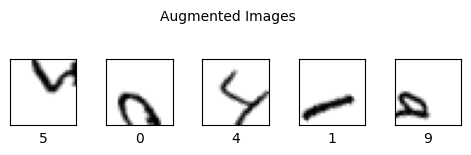

In [ ]:
augmentR = ImageDataGenerator(
    rotation_range=100,
    width_shift_range=10,
    height_shift_range=10,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

augmentR.fit(x_train)

augmented_images = []
for x_batch, y_batch in augmentR.flow(x_train, y_train, batch_size=1, shuffle=False):
    augmented_images.append(x_batch[0])
    if len(augmented_images) >= 5:
        break

plt.figure(figsize=(6, 5))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_images[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

plt.suptitle('Augmented Images', fontsize=10)
plt.show()

**Save augmented image data to disk**

In [ ]:
save_dir = 'augmented_images'
os.makedirs(save_dir, exist_ok=True)

augmentR.fit(x_train)

# Generate augmented images and save them to disk
for i, (x_batch, _) in enumerate(augmentR.flow(x_train, y_train, batch_size=1, shuffle=False)):
    img = array_to_img(x_batch[0], scale=True)
    img.save(os.path.join(save_dir, f'image_{i}.png'))

    if i >= 24:
        break

print("Augmented images saved to disk.")

Augmented images saved to disk.


**Develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 65ms/step - accuracy: 0.8629 - loss: 0.4399 - val_accuracy: 0.9732 - val_loss: 0.0812
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 92s 76ms/step - accuracy: 0.9804 - loss: 0.0614 - val_accuracy: 0.9867 - val_loss: 0.0401
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 62ms/step - accuracy: 0.9890 - loss: 0.0371 - val_accuracy: 0.9891 - val_loss: 0.0313
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 73ms/step - accuracy: 0.9911 - loss: 0.0292 - val_accuracy: 0.9875 - val_loss: 0.0403
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 61ms/step - accuracy: 0.9921 - loss: 0.0240 - val_accuracy: 0.9907 - val_loss: 0.0275
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9871 - loss: 0.0367
Test Accuracy: 0.9907000064849854


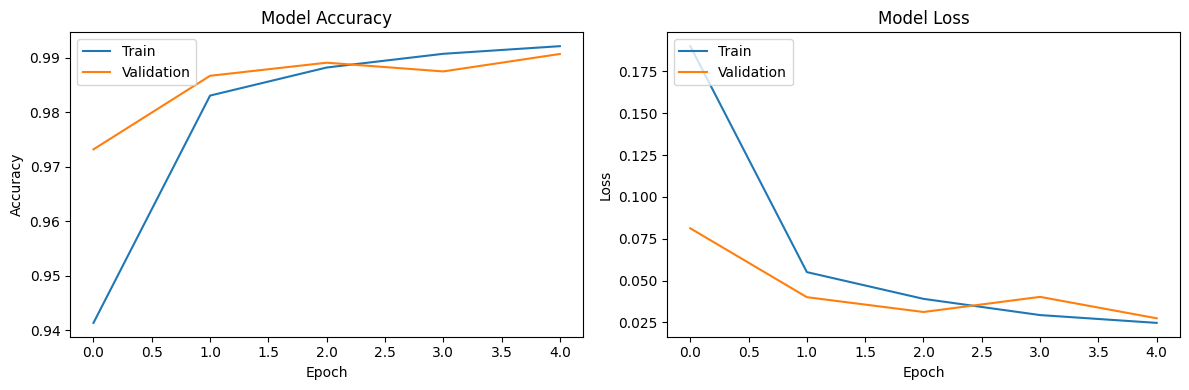

Total time taken: 381.1194951534271 seconds


In [ ]:
start_time = time.time()

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time, "seconds")

**Explore extensions to a baseline model to improve learning and model capacity.**

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Define the CNN model with extensions
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val), verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/5
760/760 ━━━━━━━━━━━━━━━━━━━━ 264s 342ms/step - accuracy: 0.9056 - loss: 0.3158 - val_accuracy: 0.9785 - val_loss: 0.0639
Epoch 2/5
760/760 ━━━━━━━━━━━━━━━━━━━━ 258s 337ms/step - accuracy: 0.9797 - loss: 0.0638 - val_accuracy: 0.9861 - val_loss: 0.0426
Epoch 3/5
760/760 ━━━━━━━━━━━━━━━━━━━━ 248s 319ms/step - accuracy: 0.9847 - loss: 0.0478 - val_accuracy: 0.9880 - val_loss: 0.0414
Epoch 4/5
760/760 ━━━━━━━━━━━━━━━━━━━━ 255s 310ms/step - accuracy: 0.9861 - loss: 0.0434 - val_accuracy: 0.9894 - val_loss: 0.0278
Epoch 5/5
760/760 ━━━━━━━━━━━━━━━━━━━━ 260s 306ms/step - accuracy: 0.9878 - loss: 0.0370 - val_accuracy: 0.9902 - val_loss: 0.0292
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9910 - loss: 0.0271
Test Accuracy: 0.9929999709129333


**Develop a finalized model, evaluate the performance of the final model, and use it to make predictions on new images.**

In [ ]:
start_time = time.time()

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

new_images = x_test[:5]  # Take first 5 test images for example

# Preprocess new images
new_images_preprocessed = new_images.reshape((-1, 28, 28, 1))

# Predict using the trained model
predictions = model.predict(new_images_preprocessed)

# Print predictions
print("Predictions:")
for i, pred in enumerate(predictions):
    predicted_label = np.argmax(pred)
    print(f"Image {i+1}: Predicted Digit - {predicted_label}")

end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time, "seconds")

Epoch 1/5
684/684 ━━━━━━━━━━━━━━━━━━━━ 48s 68ms/step - accuracy: 0.8369 - loss: 0.5205 - val_accuracy: 0.9824 - val_loss: 0.0578
Epoch 2/5
684/684 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.9808 - loss: 0.0606 - val_accuracy: 0.9826 - val_loss: 0.0529
Epoch 3/5
684/684 ━━━━━━━━━━━━━━━━━━━━ 86s 67ms/step - accuracy: 0.9873 - loss: 0.0388 - val_accuracy: 0.9885 - val_loss: 0.0339
Epoch 4/5
684/684 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.9911 - loss: 0.0287 - val_accuracy: 0.9861 - val_loss: 0.0419
Epoch 5/5
684/684 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.9920 - loss: 0.0232 - val_accuracy: 0.9882 - val_loss: 0.0378
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9845 - loss: 0.0496
Test Accuracy: 0.9882000088691711
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predictions:
Image 1: Predicted Digit - 7
Image 2: Predicted Digit - 2
Image 3: Predicted Digit - 1
Image 4: Predicted Digit - 0
Image 5: Predicted Digit - 4
Total time taken: 337.4082682132721 seconds


# Conclusion

To sum up, the model that was applied to the dataset produced nearly perfect accuracy and almost no value loss. However, it might also be because it's a widely used dataset.